In [14]:
import pandas as pd
import numpy as np
import h5py
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Embedding, Flatten

In [15]:
file = h5py.File('xy.h5', 'r')

x = file['x'][:]
y = file['y'][:]

x.shape, y.shape

((50000, 3521), (50000,))

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((40000, 3521), (40000,), (10000, 3521), (10000,))

In [17]:
model = Sequential([
    Input(shape=(3521,)),
    #Embedding(input_dim=16384, output_dim=1),
    # Flatten(),
    Dense(1, activation='sigmoid')
])

In [18]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 3522      
                                                                 
Total params: 3522 (13.76 KB)
Trainable params: 3522 (13.76 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
optimizer = Adam(learning_rate=.0001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy','mse'])
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=256, batch_size=8192)

Epoch 1/256
5/5 [==============================] - 1s 134ms/step - loss: 18.4176 - accuracy: 0.4995 - mse: 0.4904 - val_loss: 18.4639 - val_accuracy: 0.4943 - val_mse: 0.4953
Epoch 2/256
5/5 [==============================] - 0s 86ms/step - loss: 17.6964 - accuracy: 0.5016 - mse: 0.4884 - val_loss: 18.0425 - val_accuracy: 0.4968 - val_mse: 0.4926
Epoch 3/256
5/5 [==============================] - 1s 116ms/step - loss: 17.3276 - accuracy: 0.5016 - mse: 0.4884 - val_loss: 17.7794 - val_accuracy: 0.4987 - val_mse: 0.4903
Epoch 4/256
5/5 [==============================] - 0s 93ms/step - loss: 17.0455 - accuracy: 0.5015 - mse: 0.4885 - val_loss: 17.5244 - val_accuracy: 0.4998 - val_mse: 0.4898
Epoch 5/256
5/5 [==============================] - 0s 84ms/step - loss: 16.7720 - accuracy: 0.5016 - mse: 0.4885 - val_loss: 17.2730 - val_accuracy: 0.5021 - val_mse: 0.4890
Epoch 6/256
5/5 [==============================] - 0s 87ms/step - loss: 16.5165 - accuracy: 0.5005 - mse: 0.4884 - val_loss: 17.

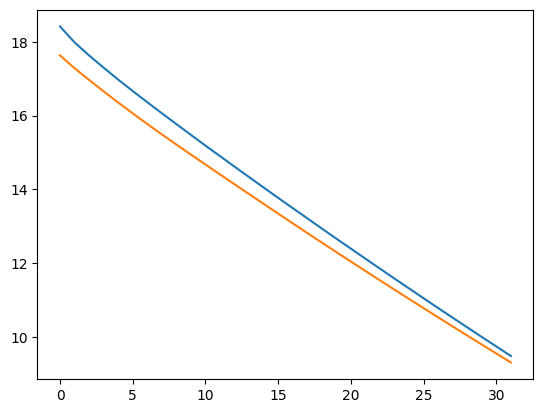

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.show()